<a href="https://colab.research.google.com/github/codingCapricorn/Bird-Migration-Analysis-Using-Machine-Learning/blob/master/Bird_Migration_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Tracking Latitude And Longitude -->>

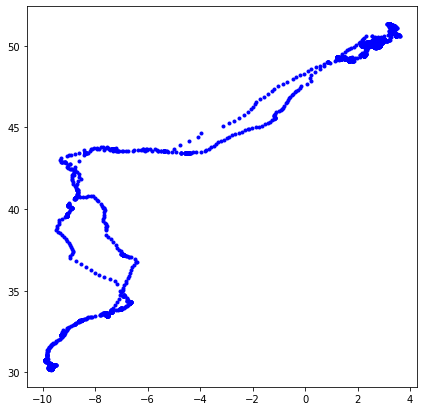

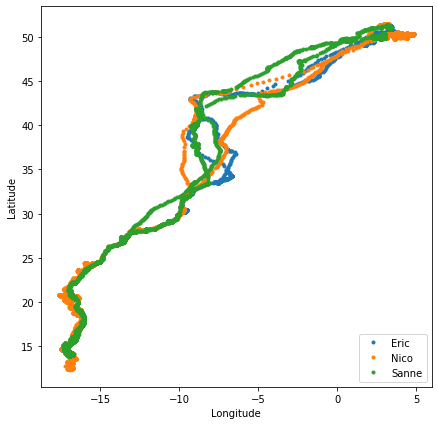

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


birddata = pd.read_csv("bird_tracking.csv") 
bird_names = pd.unique(birddata.bird_name) 

# storing the indices of the bird Eric 
ix = birddata.bird_name == "Eric"
x,y = birddata.longitude[ix], birddata.latitude[ix] 
plt.figure(figsize = (7,7)) 
plt.plot(x,y,"b.") 

''' To look at all the birds trajectories, 
	we plot each bird in the same plot '''
plt.figure(figsize = (7,7)) 
for bird_name in bird_names: 

	# storing the indices of the bird Eric 
	ix = birddata.bird_name == bird_name 
	x,y = birddata.longitude[ix], birddata.latitude[ix] 
	plt.plot(x,y,".", label=bird_name) 
plt.xlabel("Longitude") 
plt.ylabel("Latitude") 
plt.legend(loc="lower right") 
plt.show() 


2.Speed (2D) VS Frequency -->>

AttributeError: ignored

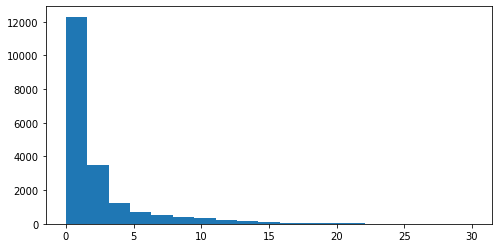

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

birddata = pd.read_csv("bird_tracking.csv") 
bird_names = pd.unique(birddata.bird_name) 

# storing the indices of the bird Eric 
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix] 

plt.figure(figsize = (8,4)) 
ind = np.isnan(speed) 
plt.hist(speed[~ind], bins = np.linspace(0,30,20), normed=True) 
plt.xlabel(" 2D speed (m/s) ") 
plt.ylabel(" Frequency ") 
plt.show() 


3.Time And Date -->>

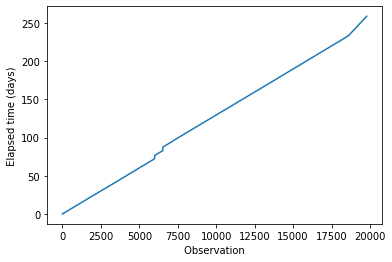

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime 
import numpy as np 

birddata = pd.read_csv("bird_tracking.csv") 
bird_names = pd.unique(birddata.bird_name) 

timestamps = [] 
for k in range(len(birddata)): 
	timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S")) 

birddata["timestamp"] = pd.Series(timestamps, index = birddata.index) 

times = birddata.timestamp[birddata.bird_name == "Eric"] 
elapsed_time = [time-times[0] for time in times] 

plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1)) 
plt.xlabel(" Observation ") 
plt.ylabel(" Elapsed time (days) ") 
plt.show() 


4.Daily Mean Speed -->>

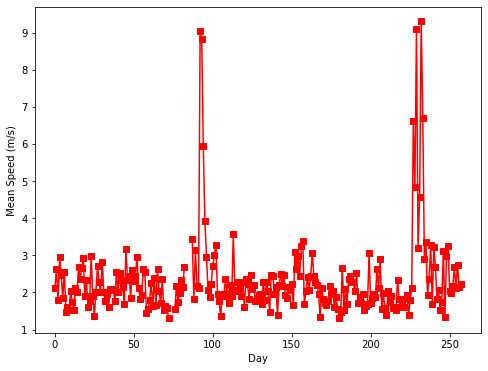

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime 
import numpy as np 

birddata = pd.read_csv("bird_tracking.csv") 
bird_names = pd.unique(birddata.bird_name) 

timestamps = [] 
for k in range(len(birddata)): 
	timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S")) 
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index) 

data = birddata[birddata.bird_name == "Eric"] 
times = data.timestamp 
elapsed_time = [time-times[0] for time in times] 
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1) 

next_day = 1
inds = [] 
daily_mean_speed = [] 
for (i,t) in enumerate(elapsed_days): 
	if t < next_day: 
		inds.append(i) 
	else: 
		daily_mean_speed.append(np.mean(data.speed_2d[inds])) 
		next_day += 1
		inds = [] 

plt.figure(figsize = (8,6)) 
plt.plot(daily_mean_speed, "rs-") 
plt.xlabel(" Day ") 
plt.ylabel(" Mean Speed (m/s) "); 
plt.show() 


** Installing CARTOPY which is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. -->>
(1) !apt-get -qq install python-cartopy python3-cartopy
(2) import cartopy

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

** There might also some error like "Geometry must be a Point or LineString" which is because of wrong version of Shapely with Cartopy as the binary package shoudn't be used, it should be built from source instead.To get rid of this follow:::---->>>>
(1) pip uninstall shapely
(2) pip install shapely --no-binary shapely

In [1]:
pip uninstall shapely

Uninstalling Shapely-1.7.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Shapely-1.7.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.7.0


In [2]:
pip install shapely --no-binary shapely

5.Cartographic View -->>

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


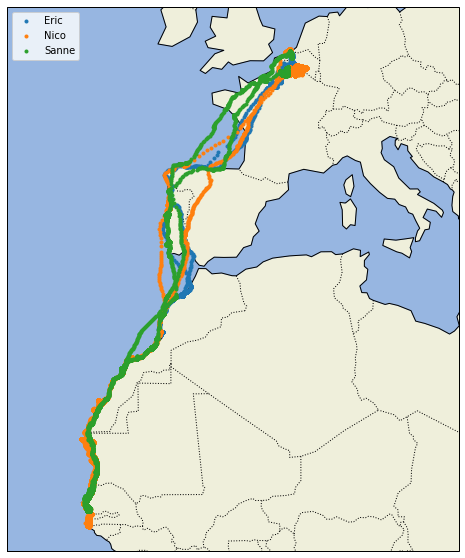

In [3]:
import pandas as pd 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 
import matplotlib.pyplot as plt 

birddata = pd.read_csv("bird_tracking.csv") 
bird_names = pd.unique(birddata.bird_name) 

# To move forward, we need to specify a 
# specific projection that we're interested 
# in using. 
proj = ccrs.Mercator() 

plt.figure(figsize=(10,10)) 
ax = plt.axes(projection=proj) 
ax.set_extent((-25.0, 20.0, 52.0, 10.0)) 
ax.add_feature(cfeature.LAND) 
ax.add_feature(cfeature.OCEAN) 
ax.add_feature(cfeature.COASTLINE) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
for name in bird_names: 
	ix = birddata['bird_name'] == name 
	x,y = birddata.longitude[ix], birddata.latitude[ix] 
	ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name) 
plt.legend(loc="upper left") 
plt.show() 
